In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [17]:
df=sns.load_dataset('car_crashes')

In [18]:
df.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [20]:
df.describe()

total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000   
50%    15.600000   4.608000   4.554000       13.857000    13.775000   
75%    18.500000   6.439000   5.604000       16.140000    16.755000   
max    23.900000   9.450000  10.038000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    886.957647  134.493137  
std     178.296285   24.835922  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%    1007.945000  151.870000  
max    1301.520000  194.780000

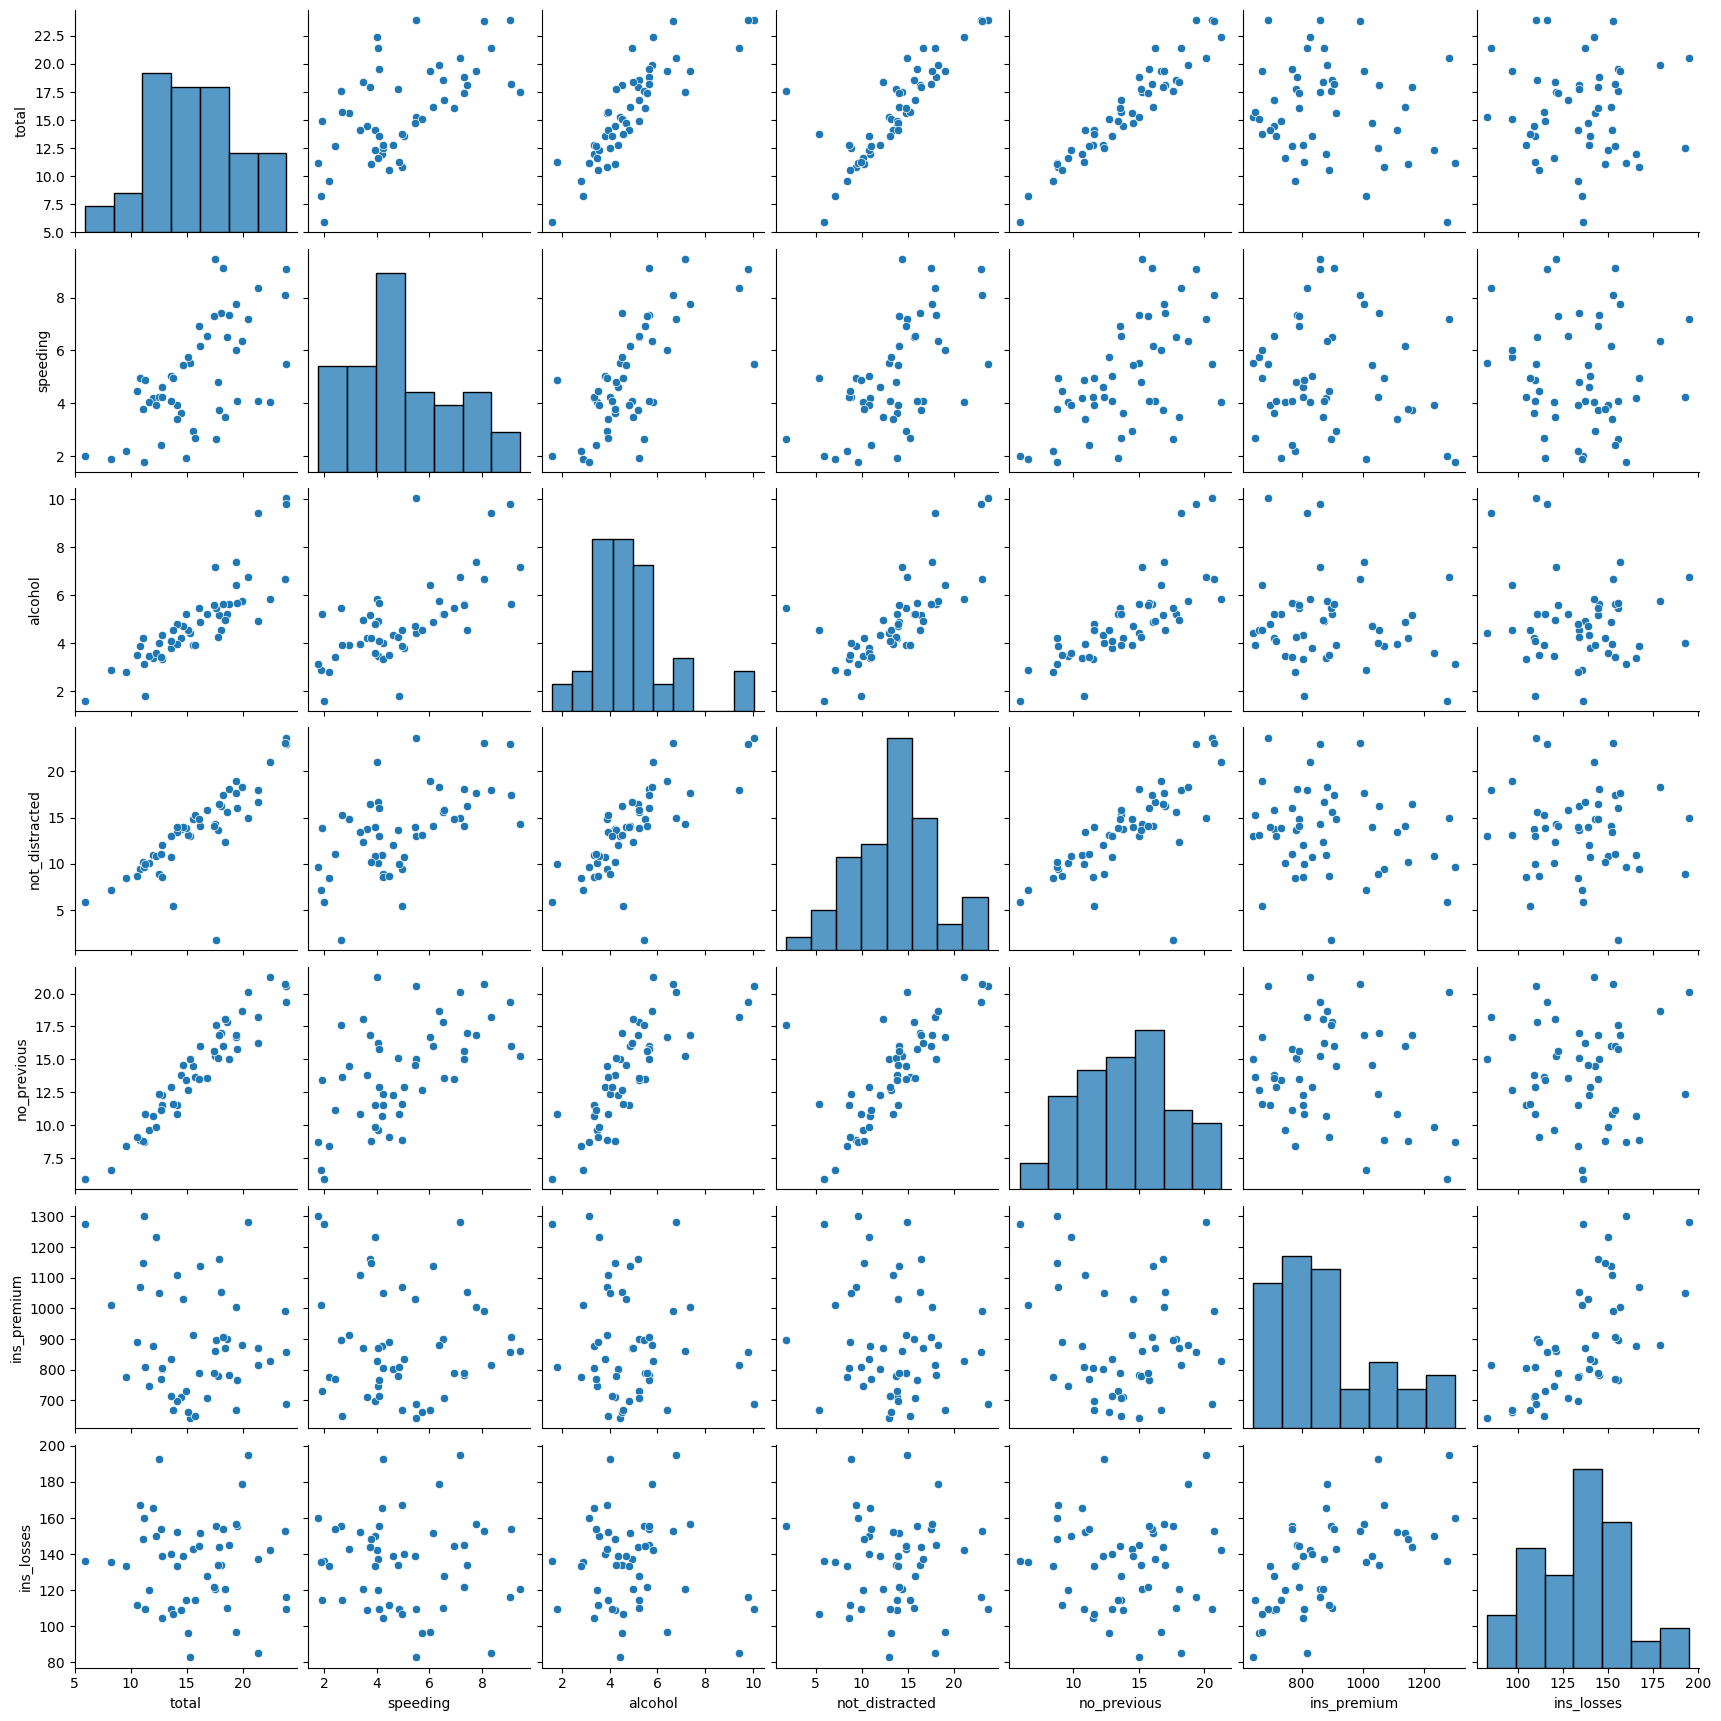

In [21]:
sns.pairplot(df)

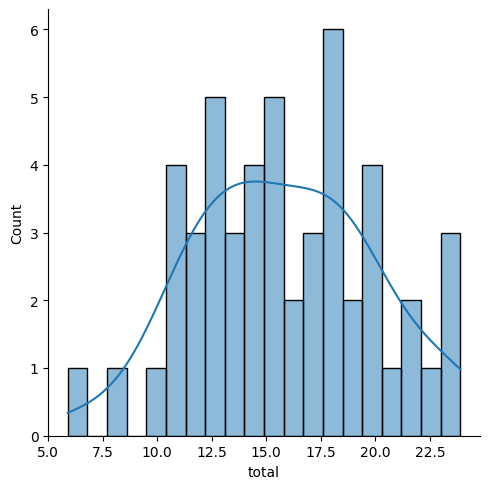

In [22]:
sns.displot(df['total'],kde=True,bins=20)

In [ ]:
numeric_df=df.drop(['abbrev'], axis=1)
numeric_df.corr()

total  speeding   alcohol  not_distracted  no_previous  \
total           1.000000  0.611548  0.852613        0.827560     0.956179   
speeding        0.611548  1.000000  0.669719        0.588010     0.571976   
alcohol         0.852613  0.669719  1.000000        0.732816     0.783520   
not_distracted  0.827560  0.588010  0.732816        1.000000     0.747307   
no_previous     0.956179  0.571976  0.783520        0.747307     1.000000   
ins_premium    -0.199702 -0.077675 -0.170612       -0.174856    -0.156895   
ins_losses     -0.036011 -0.065928 -0.112547       -0.075970    -0.006359   

                ins_premium  ins_losses  
total             -0.199702   -0.036011  
speeding          -0.077675   -0.065928  
alcohol           -0.170612   -0.112547  
not_distracted    -0.174856   -0.075970  
no_previous       -0.156895   -0.006359  
ins_premium        1.000000    0.623116  
ins_losses         0.623116    1.000000

<Axes: >

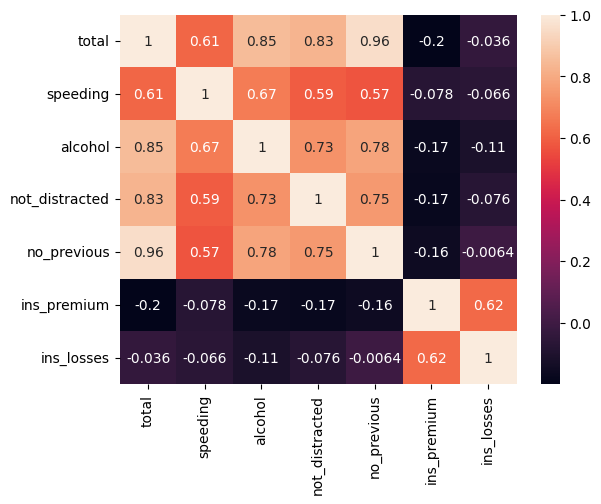

In [29]:
sns.heatmap(numeric_df.corr(),annot=True)

In [30]:
df.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [37]:
X=df[['speeding', 'alcohol', 'not_distracted']]
y=df['total']

In [39]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")


Length of X: 51
Length of y: 51


In [40]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=123)

In [43]:
print(X_train.shape)
print(X_test.shape)

(30, 3)
(21, 3)


In [46]:
model=LinearRegression()
model.fit(X_train, y_train)
acc=model.score(X_test, y_test)
acc

<IPython.core.display.Javascript object>

0.7039670974000484

In [47]:
model.coef_

array([0.07147568, 0.69314256, 0.5489203 ])

In [49]:
co_df=pd.DataFrame(model.coef_, X_train.columns, ['Coeff'])
co_df.head()

Coeff
speeding        0.071476
alcohol         0.693143
not_distracted  0.548920

In [62]:
pred=model.predict(X_test)
pred

array([12.88270095, 14.59119532, 12.15470756, 15.1011706 , 15.69077867,
       15.24854001, 15.90815981, 18.98096723, 19.99580714, 18.05720964,
        9.12685599, 10.68078961,  9.57725124, 18.16641928, 12.22964973,
       13.53742211, 17.24947272, 12.84835451, 22.51052721, 13.43966855,
       19.14558563])

In [58]:
y_test

29    11.6
13    12.8
47    10.6
31    18.4
10    15.6
12    15.3
35    14.1
0     18.8
43    19.4
18    20.5
8      5.9
21     8.2
24    17.6
11    17.5
30    11.2
5     13.6
1     18.1
6     10.8
48    23.8
39    11.1
36    19.9
Name: total, dtype: float64

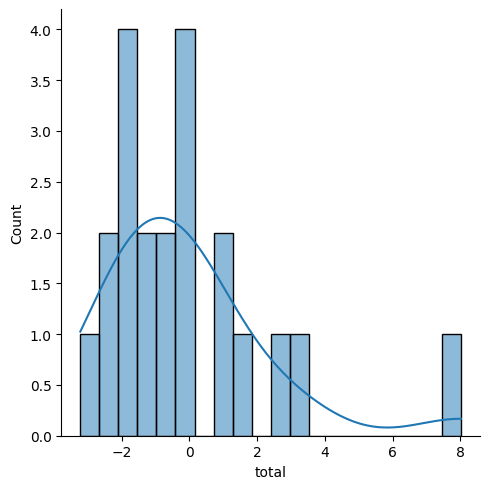

In [65]:
sns.displot(y_test-pred, kde=True, bins=20)

In [ ]:
from sklearn import metrics


In [69]:
print('MAE:' ,metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSD:' ,np.sqrt(metrics.mean_squared_error(y_test, pred)))

<IPython.core.display.Javascript object>

MAE: 1.708041676166994


<IPython.core.display.Javascript object>

MSE: 5.8501471765135475


<IPython.core.display.Javascript object>

RMSD: 2.418707749297866
